<a href="https://colab.research.google.com/github/KazumaShachou/Machine_And_DeepLeaning/blob/master/MNIST2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow
from keras.datasets import mnist  #base de dados Mnist
from tensorflow.python.keras import Sequential  #Modelo de rede neural
from tensorflow.python.keras.layers import Dense, Dropout   #Neuronios(base de rede) e regularizador(evita overfit)
from tensorflow.compat.v1.keras.optimizers import RMSprop  #Otimizador (back propagation)

In [2]:
#carregando os dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

In [3]:
print('Quantidade de imagens para treino :', len(x_treino))
print('Quantidade de imagens para teste :', len(x_teste))

Quantidade de imagens para treino : 60000
Quantidade de imagens para teste : 10000


In [4]:
primeira_imagem = x_treino[0]
print(primeira_imagem)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print('o formato da primeira imagem', primeira_imagem.shape, type(primeira_imagem.shape))

o formato da primeira imagem (28, 28) <class 'tuple'>


Essa imagem representa 6


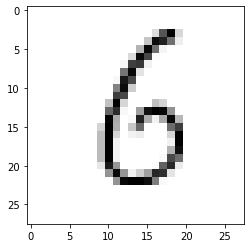

In [6]:
import matplotlib.pyplot as plt

indice = 18
print('Essa imagem representa', y_treino[indice])
plt.imshow(x_treino[indice], cmap=plt.cm.binary)
plt.show()

In [7]:
#achatando a matriz de pixels e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem = x_treino[0].shape  #28,28
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]  #28*28 = 784

x_treino = x_treino.reshape(quantidade_treino, resolucao_total	)    #x_treino foi achatado aqui, pelo reshape(mudando formato)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total	)    #so executar 1 vez ou pode dar erro, se for usar novamente, executar de novo do 0


In [8]:
#255 vira 1
#127 vira 0.5
#0 é 0

#imagem fornece 255 de valor maximo, vamos normaliza-lo

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /=  255
print(x_treino[0][350], type(x_treino[0][350]))    #não executar de novo, ou dara erro  

0.27450982 <class 'numpy.float32'>


In [9]:
#vizualizar os dados normalizados
print('Dados normalizados', x_treino[0])

Dados normalizados [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

In [10]:

#preparação para camada de saida output
valores_unicos = set(y_treino)
print(valores_unicos)

quantidade_valores_unicos = len(valores_unicos)
#transformar valores unicos em variáveis categoricas
# numero 0 -> [1,0,0,0,0,0,0,0,0,0]
#numero 1 => [0,1,0,0,0,0,0,0,0,0]   etc

y_treino = keras.utils.to_categorical(y_treino, quantidade_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quantidade_valores_unicos)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [11]:
#criando modelo da rede neural
model = Sequential()

model.add(Dense(160, activation='relu', input_shape=(resolucao_total,)))
#adicionar o regularizador pra evitar o overfit, será o dropout

model.add(Dropout(0.2))

#segunda hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))

#mais 1 regularizador
model.add(Dropout(0.2))

#adicionando a cammada de saida output, informando a quantidade de valores unicos
model.add(Dense(quantidade_valores_unicos, activation = 'softmax'))

#resumo do modelo criado
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               125600    
_________________________________________________________________
dropout (Dropout)            (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               16100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5

In [12]:
#compilar o modelo
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [13]:
history = model.fit(x_treino, y_treino, 
                    batch_size=128,
                    epochs=20, 
                    verbose = 1, 
                    validation_data=(x_teste, y_teste))

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.4499 - accuracy: 0.8666 - val_loss: 0.1566 - val_accuracy: 0.9524
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1950 - accuracy: 0.9446 - val_loss: 0.1150 - val_accuracy: 0.9672
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1458 - accuracy: 0.9592 - val_loss: 0.1054 - val_accuracy: 0.9715
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1208 - accuracy: 0.9656 - val_loss: 0.0812 - val_accuracy: 0.9774
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9706 - val_loss: 0.0897 - val_accuracy: 0.9773
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0956 - accuracy: 0.9739 - val_loss: 0.0840 - val_accuracy: 0.9775
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0874 - accuracy: 0.9754 - val_loss: 0.0818 - val_accuracy: 0.9775
Epoch 

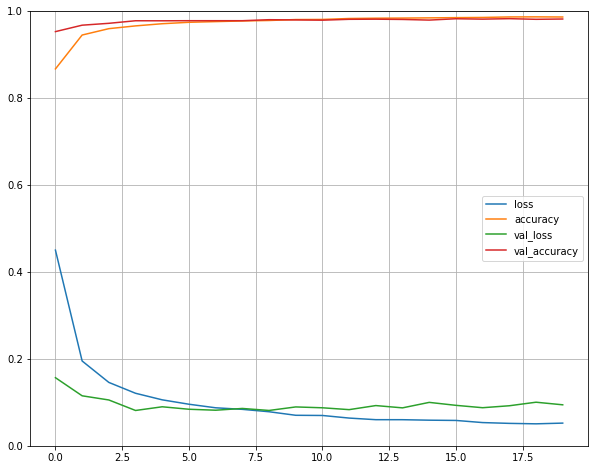

In [15]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize = (10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
#Fazendo Previsões

indice = 100
print('valor categorico[indice] :', y_teste[indice])



valor categorico[indice] : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
#preparar imagem para fazer previsão
imagem = x_teste[indice].reshape((1, resolucao_total))

prediction = model.predict(imagem)
print('Previsão', prediction)

Previsão [[1.64228508e-14 1.07838826e-20 5.47401183e-16 5.56814238e-20
  5.08655780e-13 8.17179935e-11 1.00000000e+00 1.01423087e-21
  6.92597824e-16 4.35899594e-20]]


In [21]:
# Transformar a previsão em algo que conseguimos entender

import numpy as np
predction_class = np.argmax(prediction, axis = -1)
print('Previsão ajustada :', predction_class)

Previsão ajustada : [6]


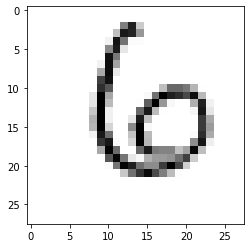

In [23]:
# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary);